In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import h5py
from importlib import reload
import PIVutils

In [2]:
#PIVutils = reload(PIVutils)
X, Y, U, V, Swirl, Cond, Prof = PIVutils.importMatlabPIVdata('/Users/Owen/Dropbox/Data/ABL/SBL PIV data/RNV45-RI2.mat',['X','Y','U','V','Swirl'],['Cond','Prof'])

In [ ]:
frame = 535

In [3]:
NanLocs = np.isnan(Swirl)
uSize = Swirl.shape
scale = (X[1,-1]-X[1,1])/(uSize[1]-1)

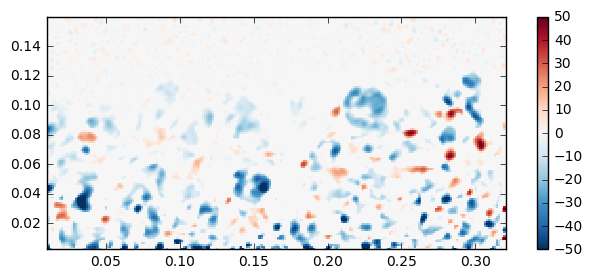

In [4]:
reload(PIVutils)
[f, ax] = PIVutils.plotScalarField(Swirl[:,:,frame]*Cond["delta"]/Cond["Utau"],X,Y,50)

# Remove background noise

In [5]:
Noise = np.std(Swirl,axis=(2,1))
Noise = np.std(Noise[-5:])
print(Noise)

0.243960186268


In [6]:
SwirlFilt = Swirl.copy()    #think this should completely copy the list, allowing me to try things

#Swirl must be above a certain background value or it is zeroed
SwirlFilt[np.absolute(Swirl)<20*Noise] = 0

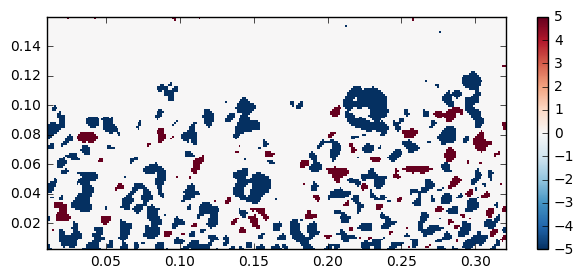

In [7]:
reload(PIVutils)
[f, ax] = PIVutils.plotScalarField(SwirlFilt[:,:,frame]*Cond["delta"]/Cond["Utau"],X,Y,5)

# Normalize field by std

In [8]:
SwirlStd = np.std(Swirl,axis=(2,1))
#print(SwirlStd)

In [9]:
#Normalize field by the std of Swirl
SwirlFilt = SwirlFilt/SwirlStd.reshape(uSize[0],1,1) #match the SwirlStd length (123) with the correct index in Swirl (also 123)

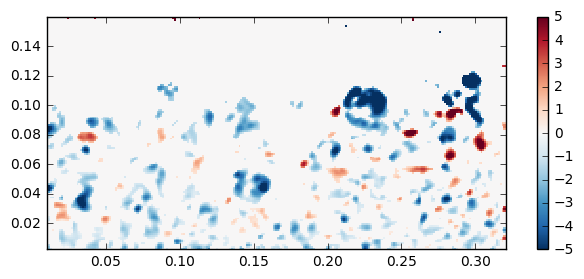

In [10]:
reload(PIVutils)
[f, ax] = PIVutils.plotScalarField(SwirlFilt[:,:,frame],X,Y,5)

In [11]:
SwirlFiltBackup = SwirlFilt.copy()

# Create thresholded field

In [12]:
SwirlFilt = SwirlFiltBackup.copy()    #think this should completely copy the list, allowing me to try things

#Then only keep those locations where swirls is greater than Thresh*SwirlStd
ThreshSTD = 1.5
SwirlFilt[np.absolute(SwirlFilt)<ThreshSTD] = 0

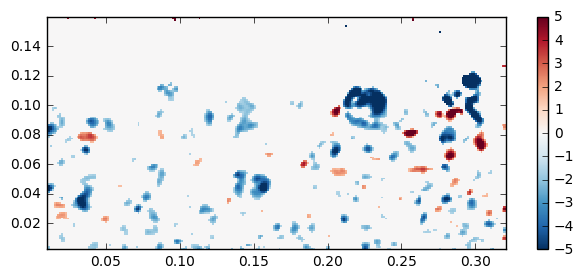

In [13]:
reload(PIVutils)
[f, ax] = PIVutils.plotScalarField(SwirlFilt[:,:,frame],X,Y,5)

# Find all blobs and filter for size


In [14]:
PIVutils = reload(PIVutils)
Thresh = 35    #30 or 35 cause bug
[num_features,features_per_frame, labeled_array, cent] = PIVutils.findBlobs(SwirlFilt,Thresh)

There are  103947  features identified
A total of  14429  are larger than the threshold size


In [15]:
cent[frame][9]

(696.28820197528614, 213.38909911471836)

In [16]:
print(np.unique(a)[9])

NameError: name 'a' is not defined

In [17]:
a = labeled_array[:,:,frame]
b = a.copy()
c = list(range(uSize[0]))
np.array(c).reshape(1,uSize[0])
#b[:,:] = np.array(c).reshape(1,uSize[0])
#print(c.shape)
b[:,:] = np.array(list(range(uSize[0]))).reshape(uSize[0],1)
#c
print(np.unique(a)[1])
b[a==np.unique(a)[9]]

10403


array([61, 62, 62, 62, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 64,
       64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 65,
       65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65,
       65, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66,
       66, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 68, 68, 68,
       68, 68, 68, 68, 68, 68, 68, 68, 68, 69, 69, 69, 69, 69, 69, 69, 69,
       69, 69, 69, 69, 69, 69, 69, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,
       70, 70, 70, 70, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 72,
       72, 72, 72, 72, 72, 72, 72, 72, 72, 73, 73, 73, 73, 73, 73, 73, 73,
       73, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74,
       74, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75,
       75, 75, 75, 75, 75, 75, 75, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76,
       76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 77, 77, 77, 77,
       77, 77, 77, 77, 77

In [18]:
S2 = SwirlFilt[:,:,frame:frame+1]
PIVutils = reload(PIVutils)
Thresh = 35    #30 or 35 cause bug
[num_features,features_per_frame, labeled_array, cent] = PIVutils.findBlobs(S2,Thresh)

There are  177  features identified
A total of  13  are larger than the threshold size


In [20]:
import numpy as np
np.savetxt('BugData.csv', S2, delimiter=',')


In [19]:
cent[0][9]

(696.28820197528614, 213.38909911471836)

In [ ]:
U.shape

In [ ]:
features_per_frame[frame]

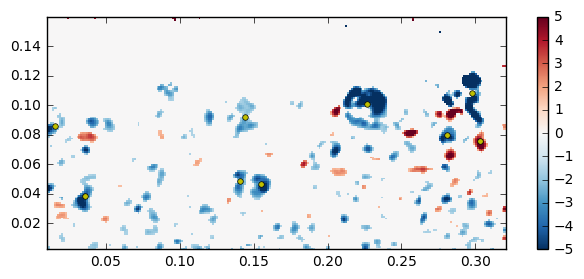

In [19]:
frame = 535
reload(PIVutils)
[f, ax] = PIVutils.plotScalarField(SwirlFilt[:,:,frame],X,Y,5)

for i in range(features_per_frame[frame]):
    plt.plot(cent[frame][i][1]*scale+X[1,1],cent[frame][i][0]*scale+Y[1,1],'oy',markersize=4,markeredgecolor=None)

# Subtract mean profile or mean at centroid of swirl blob

In [20]:
#Calculate mean velocity profiles
Umean = np.nanmean(U,axis=(2,1))
Umean
Umean.shape
#print(Umean)

Umean = np.transpose(np.tile(Umean,(uSize[2],uSize[1],1)),(2,1,0))
#print(Umean.shape)

#Subtract mean velocity profiles from velocity fields
Uf = U - Umean;
Vf = V; #<--Mean in vertical is aprox zero
#Wf = W
del Umean

# Find all thumbnails

In [21]:
BoxSize = 20     #turns out to half size of final box (box is 21 per side of BoxSize = 10)

Ut = np.zeros([2*BoxSize+1,2*BoxSize+1,num_features])    #initialize thumbnail matrices
Ut[:] = np.NAN
Vt = Ut.copy()
St = Ut.copy()
print(Ut.shape)


(41, 41, 7973)


In [22]:
#pad out velocity fields so that there are NaNs around in all directions
Uf2 = np.zeros([uSize[0]+2*BoxSize,uSize[1]+2*BoxSize+1,uSize[2]])    
Uf2[:] = np.NAN
Vf2 = Uf2.copy()
Sf2 = Uf2.copy()

print(Uf.shape)
print(Uf2.shape)

Uf2[BoxSize:-1*BoxSize,BoxSize:-1*BoxSize-1,:] = Uf.copy()
Vf2[BoxSize:-1*BoxSize,BoxSize:-1*BoxSize-1,:] = Vf.copy()
Sf2[BoxSize:-1*BoxSize,BoxSize:-1*BoxSize-1,:] = SwirlFilt.copy()

(123, 242, 750)
(163, 283, 750)


In [23]:
print(range(len(cent)))
print(np.sum(features_per_frame))

range(0, 750)
7973


In [24]:
#Round all centroids to integers
for i in range(len(cent)):
    for j in range(len(cent[i])):
        #print(i, j)
        cent[i][j] = (int(round(cent[i][j][0])), int(round(cent[i][j][1])))

/Users/Owen/anaconda/lib/python3.5/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


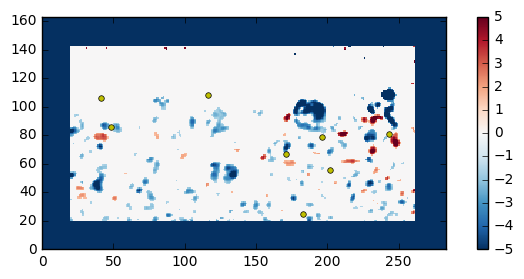

In [25]:
# Just to check, plot the new masked matrix to ensure its what we think it is. 
reload(PIVutils)
[f, ax] = PIVutils.plotScalarField(Sf2[:,:,frame],bound=5)

for i in range(features_per_frame[1]):
    plt.plot(cent[1][i][1]+BoxSize,cent[1][i][0]+BoxSize,'oy',markersize=4,markeredgecolor=None)

In [26]:
thumb = 0
for i in range(len(cent)):
    for j in range(len(cent[i])):
        
        Ut[:,:,thumb] = Uf2[cent[i][j][0]:cent[i][j][0]+2*BoxSize+1,cent[i][j][1]:cent[i][j][1]+2*BoxSize+1,i]  
        #print(cent[i][j][0])
        #Vt[:,:,thumb] = Vf2[cent[i][j][0]:cent[i][j][0]+2*BoxSize+1,cent[i][j][1]:cent[i][j][1]+2*BoxSize+1,i] 
        #St[:,:,thumb] = Sf2[cent[i][j][0]:cent[i][j][0]+2*BoxSize+1,cent[i][j][1]:cent[i][j][1]+2*BoxSize+1,i]  
        thumb+=1
        #print(thumb)
    

ValueError: could not broadcast input array from shape (0,41) into shape (41,41)

In [27]:
cent[i][j][0]

696

In [29]:
i

535

In [ ]:
[f, ax] = PIVutils.plotScalarField(St[:,:,0],bound=5)

# Get thumbnails as part of script

In [ ]:
reload(PIVutils)
BoxSize = 20

Ut, Vt, St = PIVutils.getThumbnails2D(Uf,Vf,Swirl,cent,BoxSize)

In [ ]:
[f, ax] = PIVutils.plotScalarField(St[:,:,0],bound=5)

# Now do POD on the resulting thumbnails

In [ ]:
#Set all NaNs to zero
Ut[np.isnan(Ut)] = 0
Vt[np.isnan(Vt)] = 0

uSize = Ut.shape

In [ ]:
uAll = np.concatenate((Ut.reshape(uSize[0]*uSize[1],uSize[2]), Vt.reshape(uSize[0]*uSize[1],uSize[2])), axis = 0)
#uAll.shape      

In [ ]:
import modred as mr

num_modes = 50;
modes, eig_vals = mr.compute_POD_matrices_snaps_method(uAll, list(range(num_modes)))

In [ ]:
menergy = eig_vals/np.sum(eig_vals)

In [ ]:
#Rearrange mode data to get mode fields
modeSize = modes.shape
Umodes = modes[0:uSize[0]*uSize[1],:];
Vmodes = modes[uSize[0]*uSize[1]:modeSize[0]+1,:];
Umodes.shape

#Umodes = np.reshape(Umodes,(uSize[0],uSize[1],num_modes))
Umodes2 = np.zeros((uSize[0],uSize[1],num_modes))
Vmodes2 = np.zeros((uSize[0],uSize[1],num_modes))

for i in range(num_modes):
    #i=1
    Umodes2[:,:,i] = np.reshape(Umodes[:,i],(uSize[0],uSize[1]))
    Vmodes2[:,:,i] = np.reshape(Vmodes[:,i],(uSize[0],uSize[1]))
    #Umodes.shape
    #uSize[0]*uSize[1]
    
Umodes = Umodes2 
Vmodes = Vmodes2
del Umodes2,Vmodes2

In [ ]:
import PODutil
PODutil.plotPODmodes2D(X[:2*BoxSize+1,:2*BoxSize+1],Y[:2*BoxSize+1,:2*BoxSize+1],Umodes,Vmodes,list(range(25)))